Potrzebne importy i dane zadania

In [15]:
import pygad
import numpy
import time

items = [{'item': 'zegar', 'value': 100, 'weight': 7},
         {'item': 'obraz-pejzaż', 'value': 300, 'weight': 7},
         {'item': 'obraz-portret', 'value': 200, 'weight': 6},
         {'item': 'radio', 'value': 40, 'weight': 2},
         {'item': 'laptop', 'value': 500, 'weight': 5},
         {'item': 'lampka nocna', 'value': 70, 'weight': 6},
         {'item': 'srebrne sztućce', 'value': 100, 'weight': 1},
         {'item': 'porcelana', 'value': 250, 'weight': 3},
         {'item': 'figura z brązu', 'value': 300, 'weight': 10},
         {'item': 'skórzana torebka', 'value': 280, 'weight': 3},
         {'item': 'odkurzacz', 'value': 300, 'weight': 15}]


Tworzymy array dla value i weight

In [16]:
values = numpy.array(list(map(lambda x: x['value'], items)))
weights = numpy.array(list(map(lambda x: x['weight'], items)))


Funkcja fitness wymnaza nasze geny w solution prze Weights dla totalWeight i przez vlaues dla totalValue
Jesli waga jest większa niz 25 funkcja zwróci 0
w przeciwnym przypadku zwróci totalValue
Im wyzsze totalValue tym lepiej

In [17]:
gene_space = [0, 1]

def fitness_func(solution, solution_idx):
    totalWeight = numpy.sum(solution * weights)
    totalValue = numpy.sum(solution * values)
    if totalWeight >25:
        return 0
    fitness = totalValue
    return fitness

In [18]:
fitness_function = fitness_func

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = len(items)

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8


Inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
wartosc reach w stop_criteria wyznacza przy jakiej wartosci przestajemy dalej szukac

Pętla włączająca instancje 10 razy i mierząca czas jej wykonywania
Kazdy z 10 czasów dodajemy do tablicy times

In [20]:
times=[]

for i in range(10):
    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=["reach_1600"])
    start = time.time()
    ga_instance.run()
    end = time.time()
    instTime = end - start
    times.append(instTime)

Wyniki

Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
ilosc pokolen do najlepszego rozwiązania = 20
sredni czas 0.0028220176696777343
Predicted output based on the best solution : 1630.0


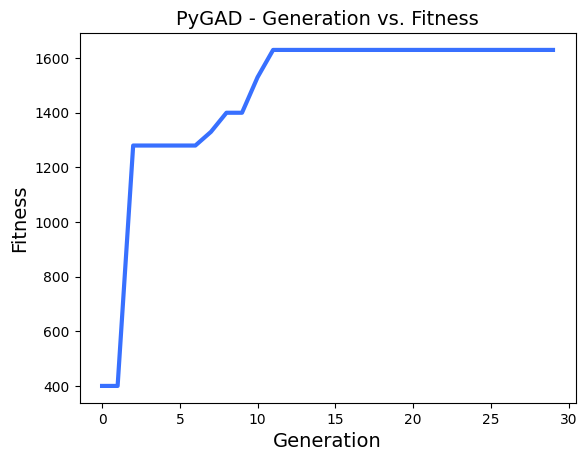

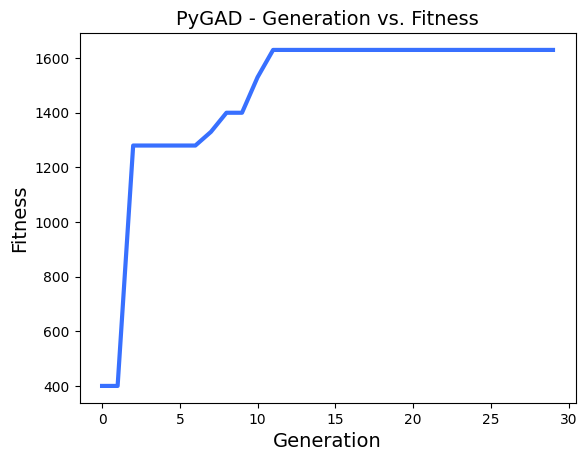

In [21]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("ilosc pokolen do najlepszego rozwiązania =",ga_instance.generations_completed)
print("sredni czas", format(numpy.mean(times)))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(numpy.array([item['value'] for item in items])*solution)

print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()